In [262]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [263]:
def avg(arr):
    var = np.std(arr)**2
    mean = np.mean(arr)
    arr = arr[(arr-mean)**2<var]
    return np.mean(arr)

In [267]:
def findP(pArr,vArr,v):
    vArr = (vArr - v)**2
    possibles = pArr[vArr<0.1*v**2]
    mu = np.mean(possibles)
    possibles = possibles[possibles>mu]
    vArr = vArr[possibles<mu]
    ind = np.argmin(vArr)
    return possibles[ind]
    

In [213]:
path = r'C:/Users/William/Desktop/PMN-PT011 700V.tab'
d = np.genfromtxt(path, delimiter="\t")
d = np.transpose(d)

In [214]:
#Extraction of applied field and measured polarization
voltages = d[::2,2:]
polarizations = d[1::2,2:]

In [215]:
#Extraction of temperatures
temps = np.genfromtxt(path, delimiter="K\t-\t", max_rows=1)
temps[-1] = 2*temps[-2] - temps[-3]
nTemps = temps.size

In [216]:
#Mapping temperature to a colour
Tmax = np.max(temps)
Tmin = np.min(temps)
Tcolors = (temps - np.min(temps))/(Tmax-Tmin)
coolheatTransition = np.argmax(temps)

C:\Users\William\Miniconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


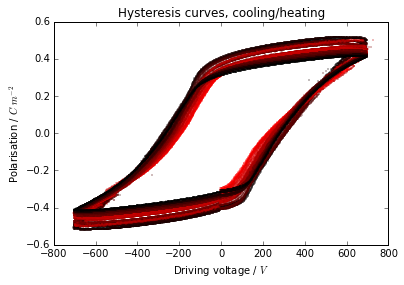

In [217]:
#Plotting all the hysteresis curves
for n in range(nTemps):
    plt.scatter(voltages[n],polarizations[n], color = (Tcolors[n], 0, 0), s =0.1)
plt.ylabel('Polarisation / $C\,m^{-2}$')
plt.xlabel('Driving voltage / $V$')
plt.title('Hysteresis curves, cooling/heating')
plt.savefig('hysteresis700VHC.png',dpi = 600, bbox_inches='tight')
plt.show()

C:\Users\William\Miniconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


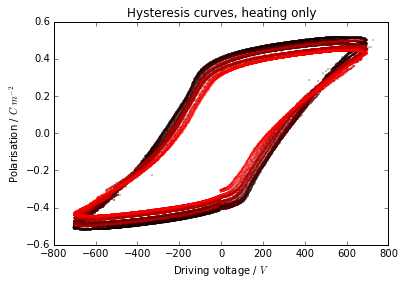

In [218]:
#Heating only
for n in range(coolheatTransition+1):
    plt.scatter(voltages[n],polarizations[n], color = (Tcolors[n], 0, 0), s =0.1)
plt.ylabel('Polarisation / $C\,m^{-2}$')
plt.xlabel('Driving voltage / $V$')
plt.title('Hysteresis curves, heating only')
plt.savefig('hysteresis700VH.png',dpi = 600, bbox_inches='tight')
plt.show()

C:\Users\William\Miniconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


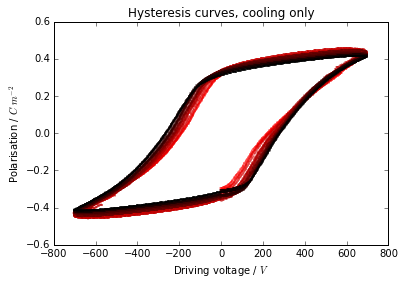

In [219]:
#Cooling only
for n in range(coolheatTransition+1,nTemps):
    plt.scatter(voltages[n],polarizations[n], color = (Tcolors[n], 0, 0), s =0.1)
plt.ylabel('Polarisation / $C\,m^{-2}$')
plt.xlabel('Driving voltage / $V$')
plt.title('Hysteresis curves, cooling only')
plt.savefig('hysteresis700VC.png',dpi = 600, bbox_inches='tight')

plt.show()

In [220]:
maxPs = np.zeros(nTemps)
smoothness = 10
for n in range(nTemps):
    maxPs[n] = avg(np.partition(polarizations[n], -smoothness)[-smoothness:])
    

C:\Users\William\Miniconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


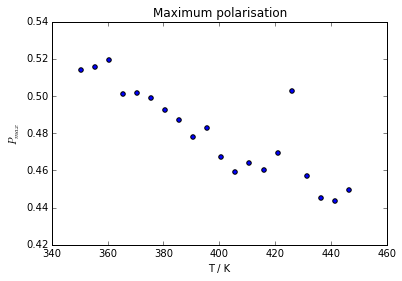

In [242]:
x = temps[:coolheatTransition]
y = maxPs[:coolheatTransition]
plt.scatter(x,y)
plt.title('Maximum polarisation')
plt.xlabel('T / K')
plt.ylabel('$P_{max}$')
plt.show()

C:\Users\William\Miniconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


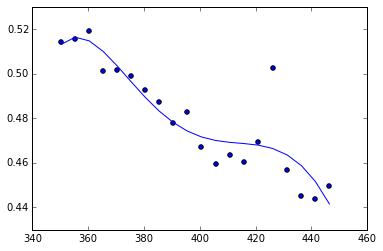

In [259]:
coeff = np.polyfit(x,y,5)
p = np.poly1d(coeff)
estY = p(x)
plt.plot(x,estY)
plt.scatter(x,y)
plt.show()

C:\Users\William\Miniconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


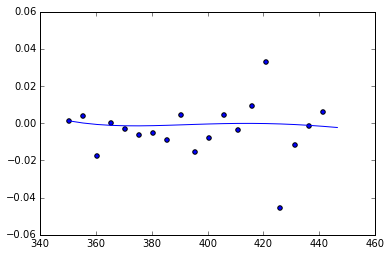

In [260]:
pdiff = np.polyder(p)
estD = pdiff(x)
D = np.diff(y)
plt.scatter(x[:-1],D)
plt.plot(x,estD)
plt.show()

In [222]:
temps

array([ 350.41,  355.35,  360.38,  365.41,  370.42,  375.45,  380.46,
        385.48,  390.5 ,  395.51,  400.63,  405.73,  410.78,  415.88,
        420.98,  426.11,  431.35,  436.44,  441.45,  446.49,  450.03,
        450.02,  445.61,  440.58,  435.54,  430.54,  425.44,  420.31,
        415.29,  410.26,  405.26,  400.14,  395.03,  390.01,  384.99,
        379.99,  374.97,  369.95,  364.92,  359.93,  354.91,  349.89])

In [223]:
Tcolors

array([ 0.00519273,  0.05452367,  0.10475335,  0.15498302,  0.20501298,
        0.25524266,  0.30527262,  0.35540244,  0.40553225,  0.45556221,
        0.50669063,  0.55761933,  0.60804873,  0.65897743,  0.70990613,
        0.76113441,  0.81346115,  0.86428999,  0.91431995,  0.96464949,
        1.        ,  0.99990014,  0.95586179,  0.90563212,  0.85530258,
        0.80537248,  0.75444378,  0.7032155 ,  0.65308568,  0.602856  ,
        0.5529259 ,  0.50179748,  0.45076892,  0.40063911,  0.35050929,
        0.30057919,  0.25044937,  0.20031955,  0.15008987,  0.10025964,
        0.05012982,  0.        ])

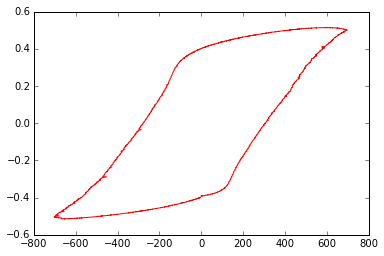

In [234]:
plt.plot(voltages[0],polarizations[0],'r')
#plt.plot(voltages[coolheatTransition],polarizations[coolheatTransition],'g')
#plt.plot(voltages[-1],polarizations[-1],'b')
plt.show()

In [265]:
P = polarizations[0]
V = voltages[0]
indices = np.where(V>0)
ind = np.argmin(P**2)
V[ind]

-277.48110000000003

In [269]:
vArr = (vArr - v)**2
possibles = pArr[vArr<0.1*v**2]
#mu = np.mean(possibles)
#possibles = possibles[possibles>mu]
#vArr = vArr[possibles<mu]
#ind = np.argmin(vArr)


NameError: name 'vArr' is not defined